## Onur Poyraz 2016795069

In this assignment I derive Q-learning and Sarsa algorithms and I compare the results.

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd

The below function chooses next action with epsilon. It chooses best normally bu if random choice is below epsilon it chooses random action.

In [36]:
def chooseNextAction(Q, x, y, is_sarsa = True):
    epsilon = 0.1
    if np.random.random() < epsilon and is_sarsa:
        action = np.random.choice(range(4))
        value = Q[x, y, action]
    else:
        max_value = -np.inf
        for action in range(4):
            value = Q[x,y,action]
            if max_value <= value:
                max_value = value
                max_action = action
        action = max_action
    return action

The below function calculates the next state and its validity.

In [37]:
def chooseNextState(x, y, current_action):
    x_new, y_new = x, y
    if current_action == 0:
        x_new = x + 1
    elif current_action == 1:
        x_new = x - 1
    elif current_action == 2:
        y_new = y + 1
    elif current_action == 3:
        y_new = y - 1
    x_new = max(0, x_new)
    x_new = min(3, x_new)
    y_new = max(0, y_new)
    y_new = min(11, y_new)
    return x_new, y_new

The below function updates Q matrix and determine the next step which agent will do.

In [38]:
def updateValueQ(Q, x, y, current_action, is_sarsa=False):
    alpha = 0.1
    gamma = 1
    x_new, y_new = chooseNextState(x, y, current_action)
    if x_new == 0 and y_new == 11:
        reward = 0
    elif x_new == 0 and 11 > y_new > 0:
        reward = -500
    else:
        reward = -1
    next_action = chooseNextAction(Q, x_new, y_new, is_sarsa)
    Q[x, y, current_action] = Q[x, y, current_action] + alpha * float((reward + gamma * Q[x_new, y_new, next_action] - Q[x, y, current_action]))
    if x_new == 0 and 11 > y_new > 0:
        return 0, 0, reward
    else:
        return x_new, y_new, reward

The below function uses all of above functions and train the agent according to given learning algorithm.

In [39]:
def algorithm(is_sarsa=False):
    q_actions_of_last_episode = [(0,0)]
    q_actions_per_episode = []
    q_rewards_per_episode = []
    sarsa_actions_of_last_episode = [(0,0)]
    sarsa_actions_per_episode = []
    sarsa_rewards_per_episode = []
    Q = np.zeros((4, 12, 4))
    for n in range(1000):
        x = 0
        y = 0
        actions = 0
        rewards = 0
        while not(x == 0 and y == 11):
            current_action = chooseNextAction(Q, x, y)
            x_new, y_new, reward = updateValueQ(Q, x, y, current_action, is_sarsa=is_sarsa)
            x = x_new
            y = y_new
            actions = actions + 1
            rewards = rewards + reward
            if n == 999:
                sarsa_actions_of_last_episode.append((x_new, y_new)) if is_sarsa else q_actions_of_last_episode.append((x_new, y_new))
            if x == 0 and y == 0:
                if is_sarsa:
                    sarsa_actions_of_last_episode = [(0, 0)]
                else:
                    q_actions_of_last_episode = [(0, 0)]
        if is_sarsa:
            sarsa_actions_per_episode.append(actions)
            sarsa_rewards_per_episode.append(rewards)
        else:
            q_actions_per_episode.append(actions)
            q_rewards_per_episode.append(rewards)
    if is_sarsa:
        return sarsa_actions_of_last_episode, sarsa_actions_per_episode, sarsa_rewards_per_episode
    else:
        return q_actions_of_last_episode, q_actions_per_episode, q_rewards_per_episode

The below function draws graph. That takes its arguments from algorithm part.

In [40]:
def plot(q_steps, q_actions, q_rewards, sarsa_steps, sarsa_actions, sarsa_rewards):
    fig1 = plt.figure()
    previous_x = 0
    previous_y = 0
    for position in q_steps:
        x, y = position[1], position[0]
        plt.arrow(previous_x, previous_y, x - previous_x, y - previous_y, head_width = 0.1, head_length = 0.2, color = 'red')
        plt.plot(x, y, 'ro', markersize=1)
        previous_x = x
        previous_y = y
        
    previous_x = 0
    previous_y = 0
    for position in sarsa_steps:
        x, y = position[1], position[0]
        plt.arrow(previous_x, previous_y, x - previous_x, y - previous_y, head_width = 0.1, head_length = 0.2, color = 'blue')
        plt.plot(x, y, 'bo', markersize=1)
        previous_x = x
        previous_y = y

    plt.plot(0, 0, 'mo', markersize=15)
    plt.plot(11, 0, 'go', markersize=15)
    axes = plt.gca()
    axes.set_xticks(range(0, 12))
    axes.set_yticks(range(0, 4))
    axes.set_title('Paths of Algoritms')
    red_patch = patches.Patch(color = 'red', label = 'Q Learning')
    blue_patch = patches.Patch(color = 'blue', label = 'Sarsa Learning')
    plt.legend(handles=[red_patch, blue_patch])
    plt.grid()
    #plt.savefig('paths_of_algoritms.png')
    plt.show(fig1)
    
    labels = ['Q learning','Sarsa Learning']

    fig2 = plt.figure(figsize=(10, 6))
    smoothing = 100
    rewards_smoothed = pd.Series(q_rewards).rolling(smoothing, min_periods=smoothing).mean()
    plt.plot(rewards_smoothed, 'r')
    rewards_smoothed = pd.Series(sarsa_rewards).rolling(smoothing, min_periods=smoothing).mean()
    plt.plot(rewards_smoothed, 'b')
    plt.xlabel("Number of Episode")
    plt.ylabel("Reward Per Episode")
    plt.title("Reward Per Episode Over Time (Smoothed)")
    plt.legend(labels)
    #plt.savefig('episode_reward.png')
    plt.show(fig2)

    fig3 = plt.figure(figsize=(10, 6))
    plt.plot(q_actions, 'r')
    plt.plot(sarsa_actions, 'b')
    plt.xlabel("Number of Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    plt.legend(labels)
    #plt.savefig('episode_length.png')
    plt.show(fig3)        

The below code runs the all of functions. I run algorithm functions from here with decided choice. İf nothing is given it is runs Q-learning algorithm. If it is stated that is_sarsa = True than it runs Sarsa algorithm. In here I run both of them and I take necessary values for further graph making. Using plot function that I write I plot necessary comparisons.

Q-Learning Steps
(0, 0)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 10)
(1, 11)
(0, 11)
Sarsa-Learning Steps
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(2, 11)
(1, 11)
(0, 11)


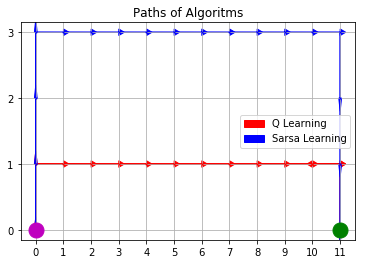

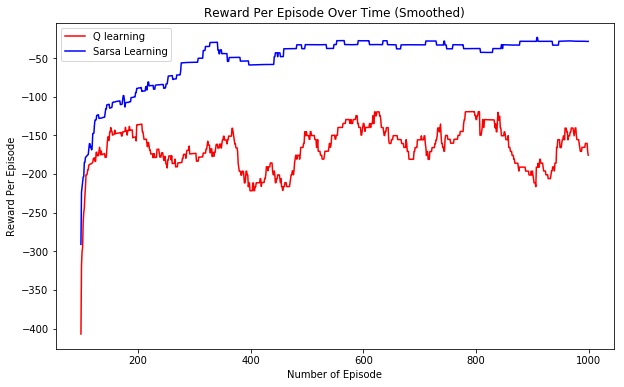

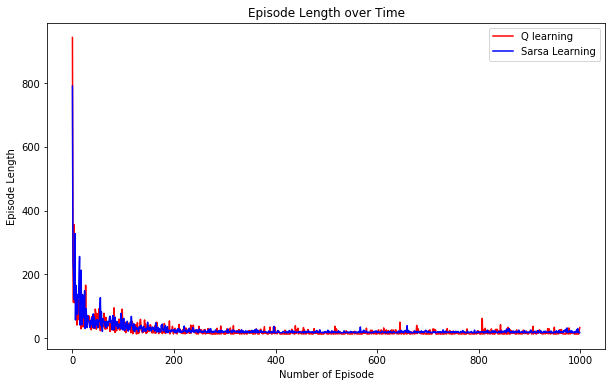

In [41]:
q_steps, q_actions, q_rewards = algorithm()
print "Q-Learning Steps"
for step in q_steps:
    print step
    
sarsa_steps, sarsa_actions, sarsa_rewards = algorithm(is_sarsa = True)
print "Sarsa-Learning Steps"
for step in sarsa_steps:
    print step
    
plot(q_steps, q_actions, q_rewards, sarsa_steps, sarsa_actions, sarsa_rewards)

In the above graphs first I write the path that agent follows according to algorithm and than I plot this in the first graph. We see that agent moves with Q-learning algorithm chooses shortest path to reach the goal. On the other hand agent which move with Sarsa algorithm chooses safest path (Actually I have to say more safe path because according to rewards or the map it does not always choose safest path) 

The Second graph gives us that rewards per episodes.(that averaged per 100 episodes). I see that agent with Sarsa algorithm takes more rewards than agent with Q-learning algorithm. This is because Sarsa follows more safest but less efficient way. It takes less reward maybe per one episode however it takes it all of time. On the other hand, agent with Q-learning algorithm choose more efficient way than Sarsa but it sometimes falls into the cliff. Therefore average rewards that agent with Sarsa algorithm taken is more than that agent with Q-learning algorithm taken.

The third graph gives us that episode lengths. It is obvious that after 40 or 50 trials both agent learn their path and episodes length is decreased dramatically. Both algorithm perform similar according to this point of view.